In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from matplotlib import pyplot as plt
from seaborn import heatmap, pairplot

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/hazardous_asteroid/nasa.csv")
# for name, dtype in data.dtypes.iteritems():
#     print(name, dtype)
data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False






There are 40 features including the target feature 'Hazardous' and 4687 data points in the dataset.



# Feature Engineering:


## Removing Irrelevant Columns:

In [ ]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

The features 'Neo Reference ID', 'Name', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbit ID' and 'Orbit Determination Date' are insignificant in training our ML model.



In [ ]:
data.drop(['Neo Reference ID', 'Name', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbit ID', 'Orbit Determination Date'], axis = 1, inplace = True)
data.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Equinox', 'Hazardous'],
      dtype='object')

In [ ]:
data['Orbiting Body'].unique(), data['Equinox'].unique()

(array(['Earth'], dtype=object), array(['J2000'], dtype=object))

As the features 'Orbiting Body' and 'Equinox' holds only one unique value, they are not important as well.



In [ ]:
data.drop(['Orbiting Body', 'Equinox'], axis = 1, inplace = True)
data.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

## Handling Missing Values:


In [ ]:
data.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly  

There are no missing values in the dataset.



## Handling Duplicate Values:

In [ ]:
data.duplicated().sum()

0

The dataset has no duplicate values.



## Feature Encoding

In [ ]:
data.dtypes

Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Eccentricity                    float64
Semi Major Axis                 float64
Inclination                     float64
Asc Node Longitude              float64
Orbital Period                  float64


Among all the features, only our target feature 'Hazardous' is categorical in nature.


In [ ]:
data['Hazardous'] = OrdinalEncoder(dtype = np.int64).fit_transform(data[['Hazardous']])
data.Hazardous.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int64

## Feature Selection:

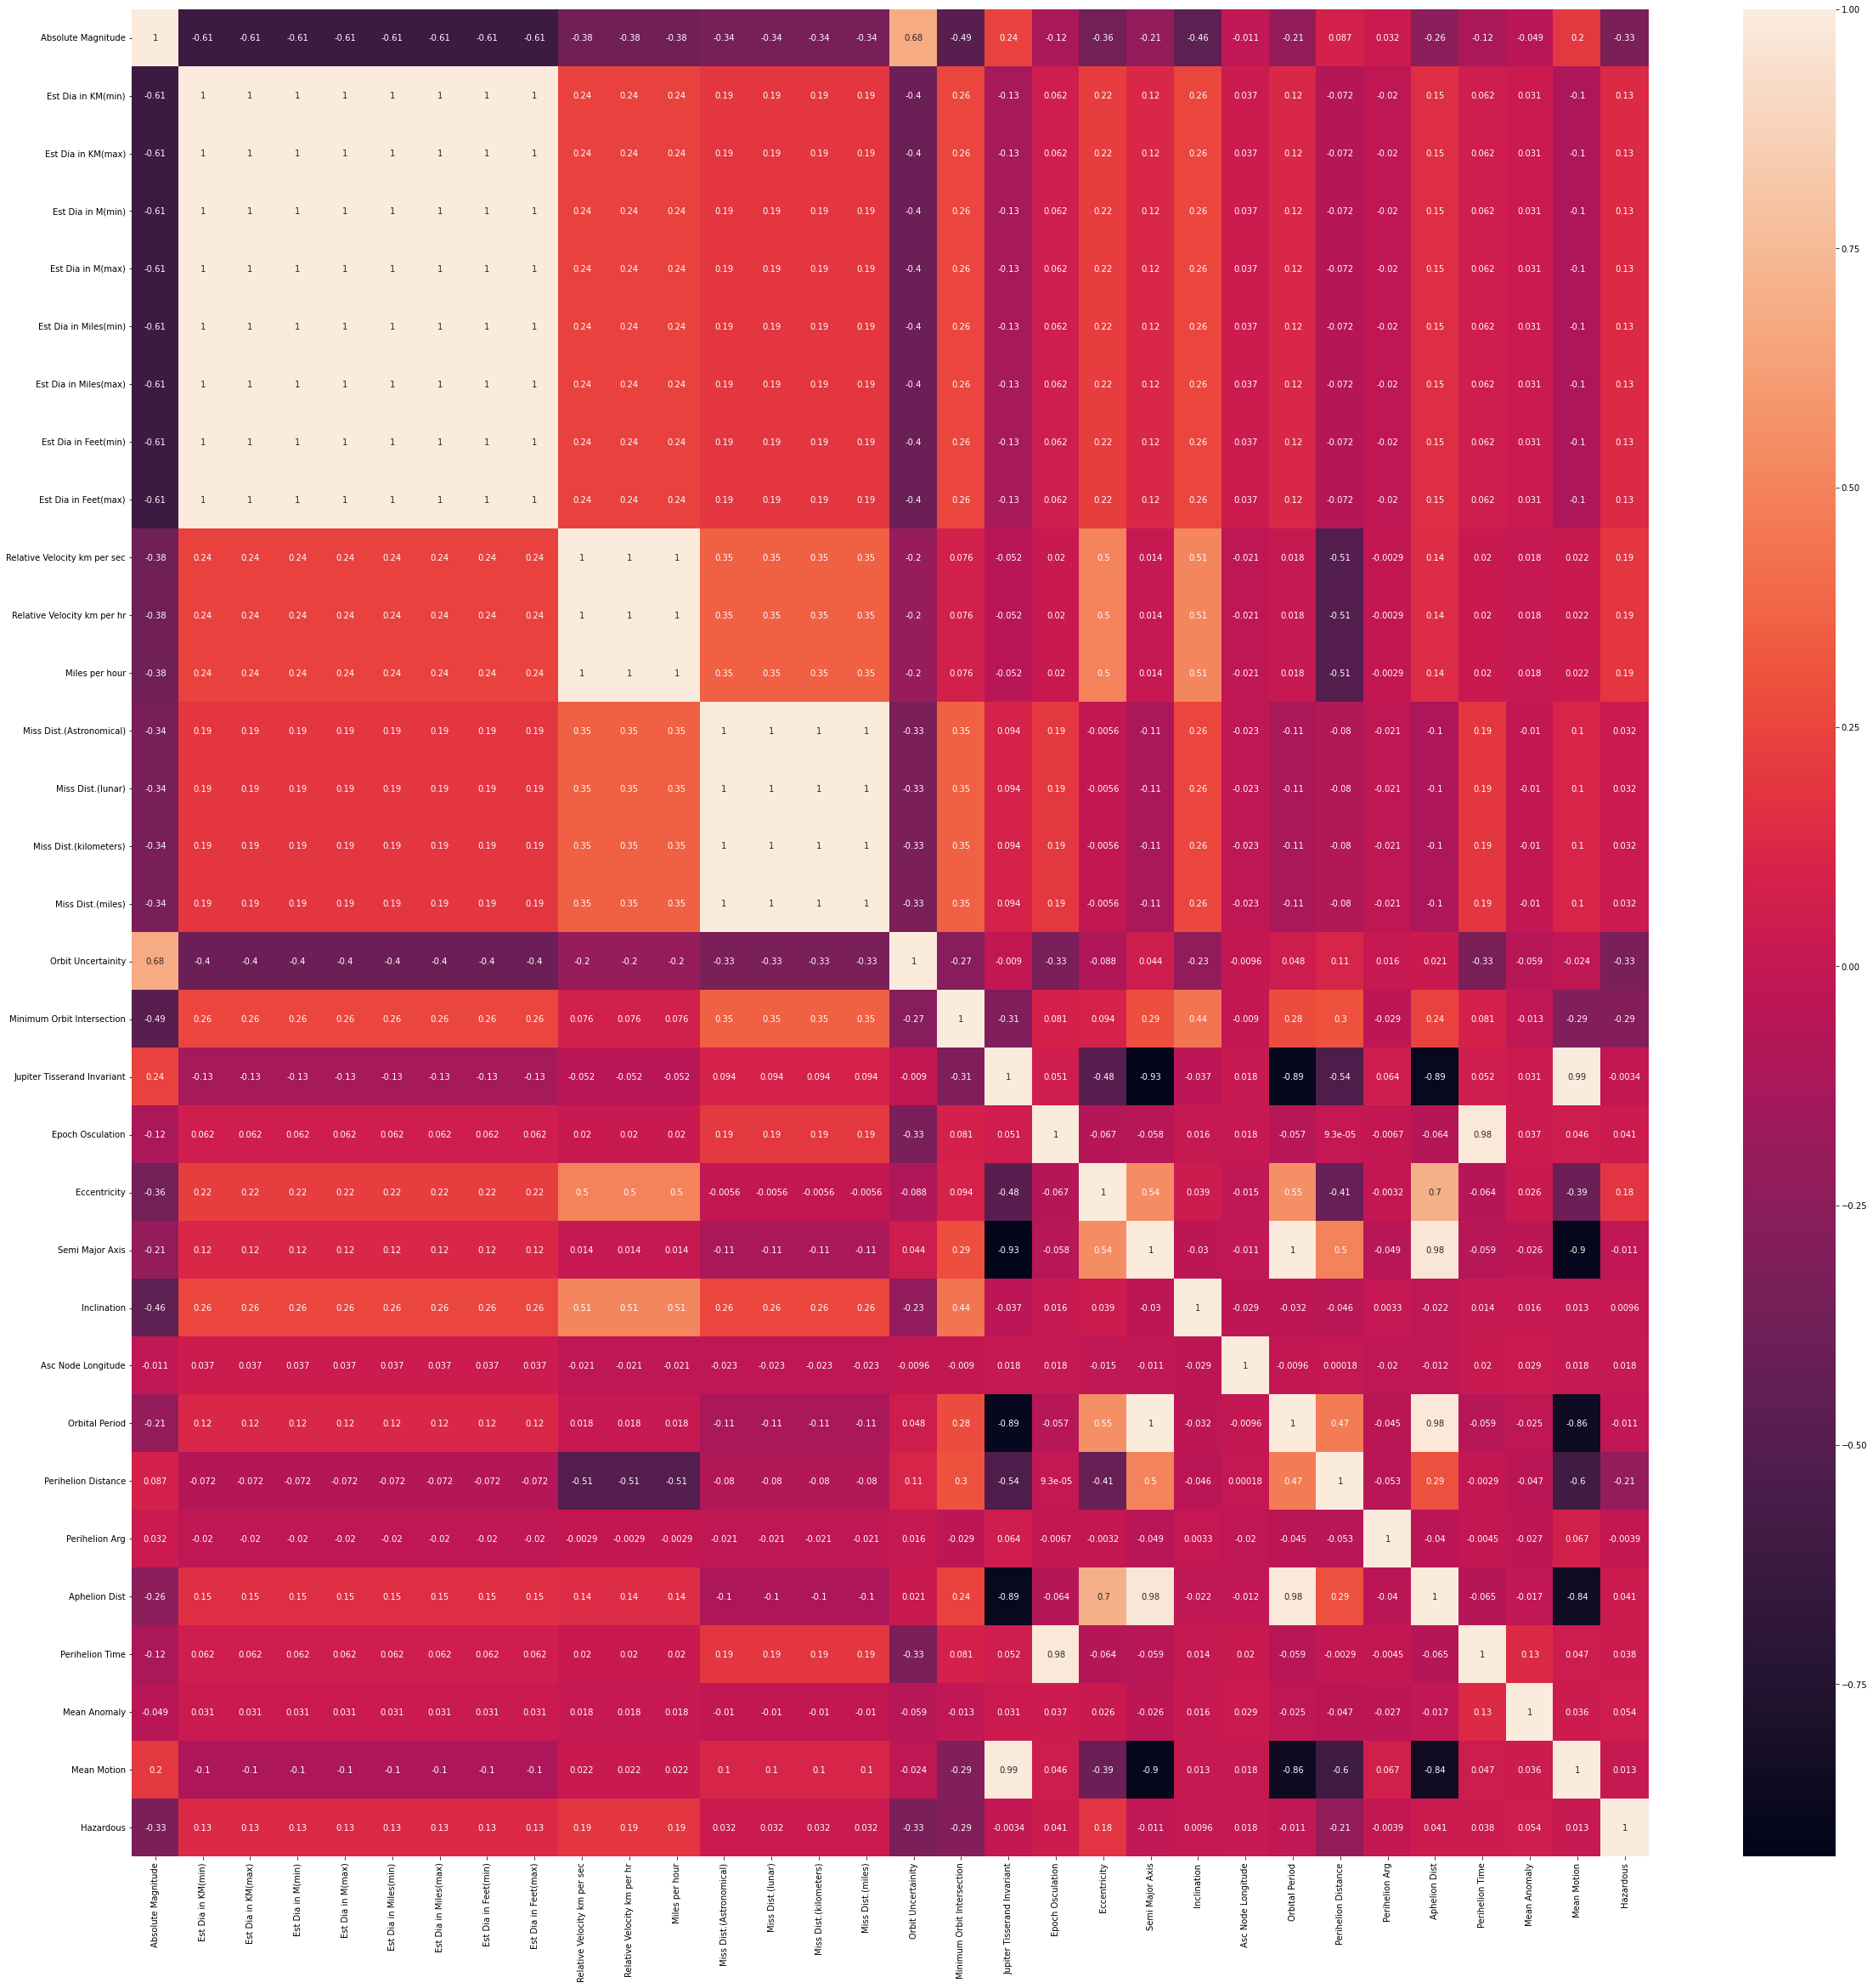

In [ ]:
plt.figure(figsize = (40,40))
heatmap(data.corr(), annot = True)

One between the pair of features with correlation value |x| >= .9 are to be eliminated.



In [ ]:
data.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Mean Motion', 'Perihelion Time', 'Orbital Period', 'Aphelion Dist', 'Semi Major Axis'], axis = 1, inplace = True)
data.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)',
       'Relative Velocity km per sec', 'Miss Dist.(Astronomical)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Inclination', 'Asc Node Longitude', 'Perihelion Distance',
       'Perihelion Arg', 'Mean Anomaly', 'Hazardous'],
      dtype='object')

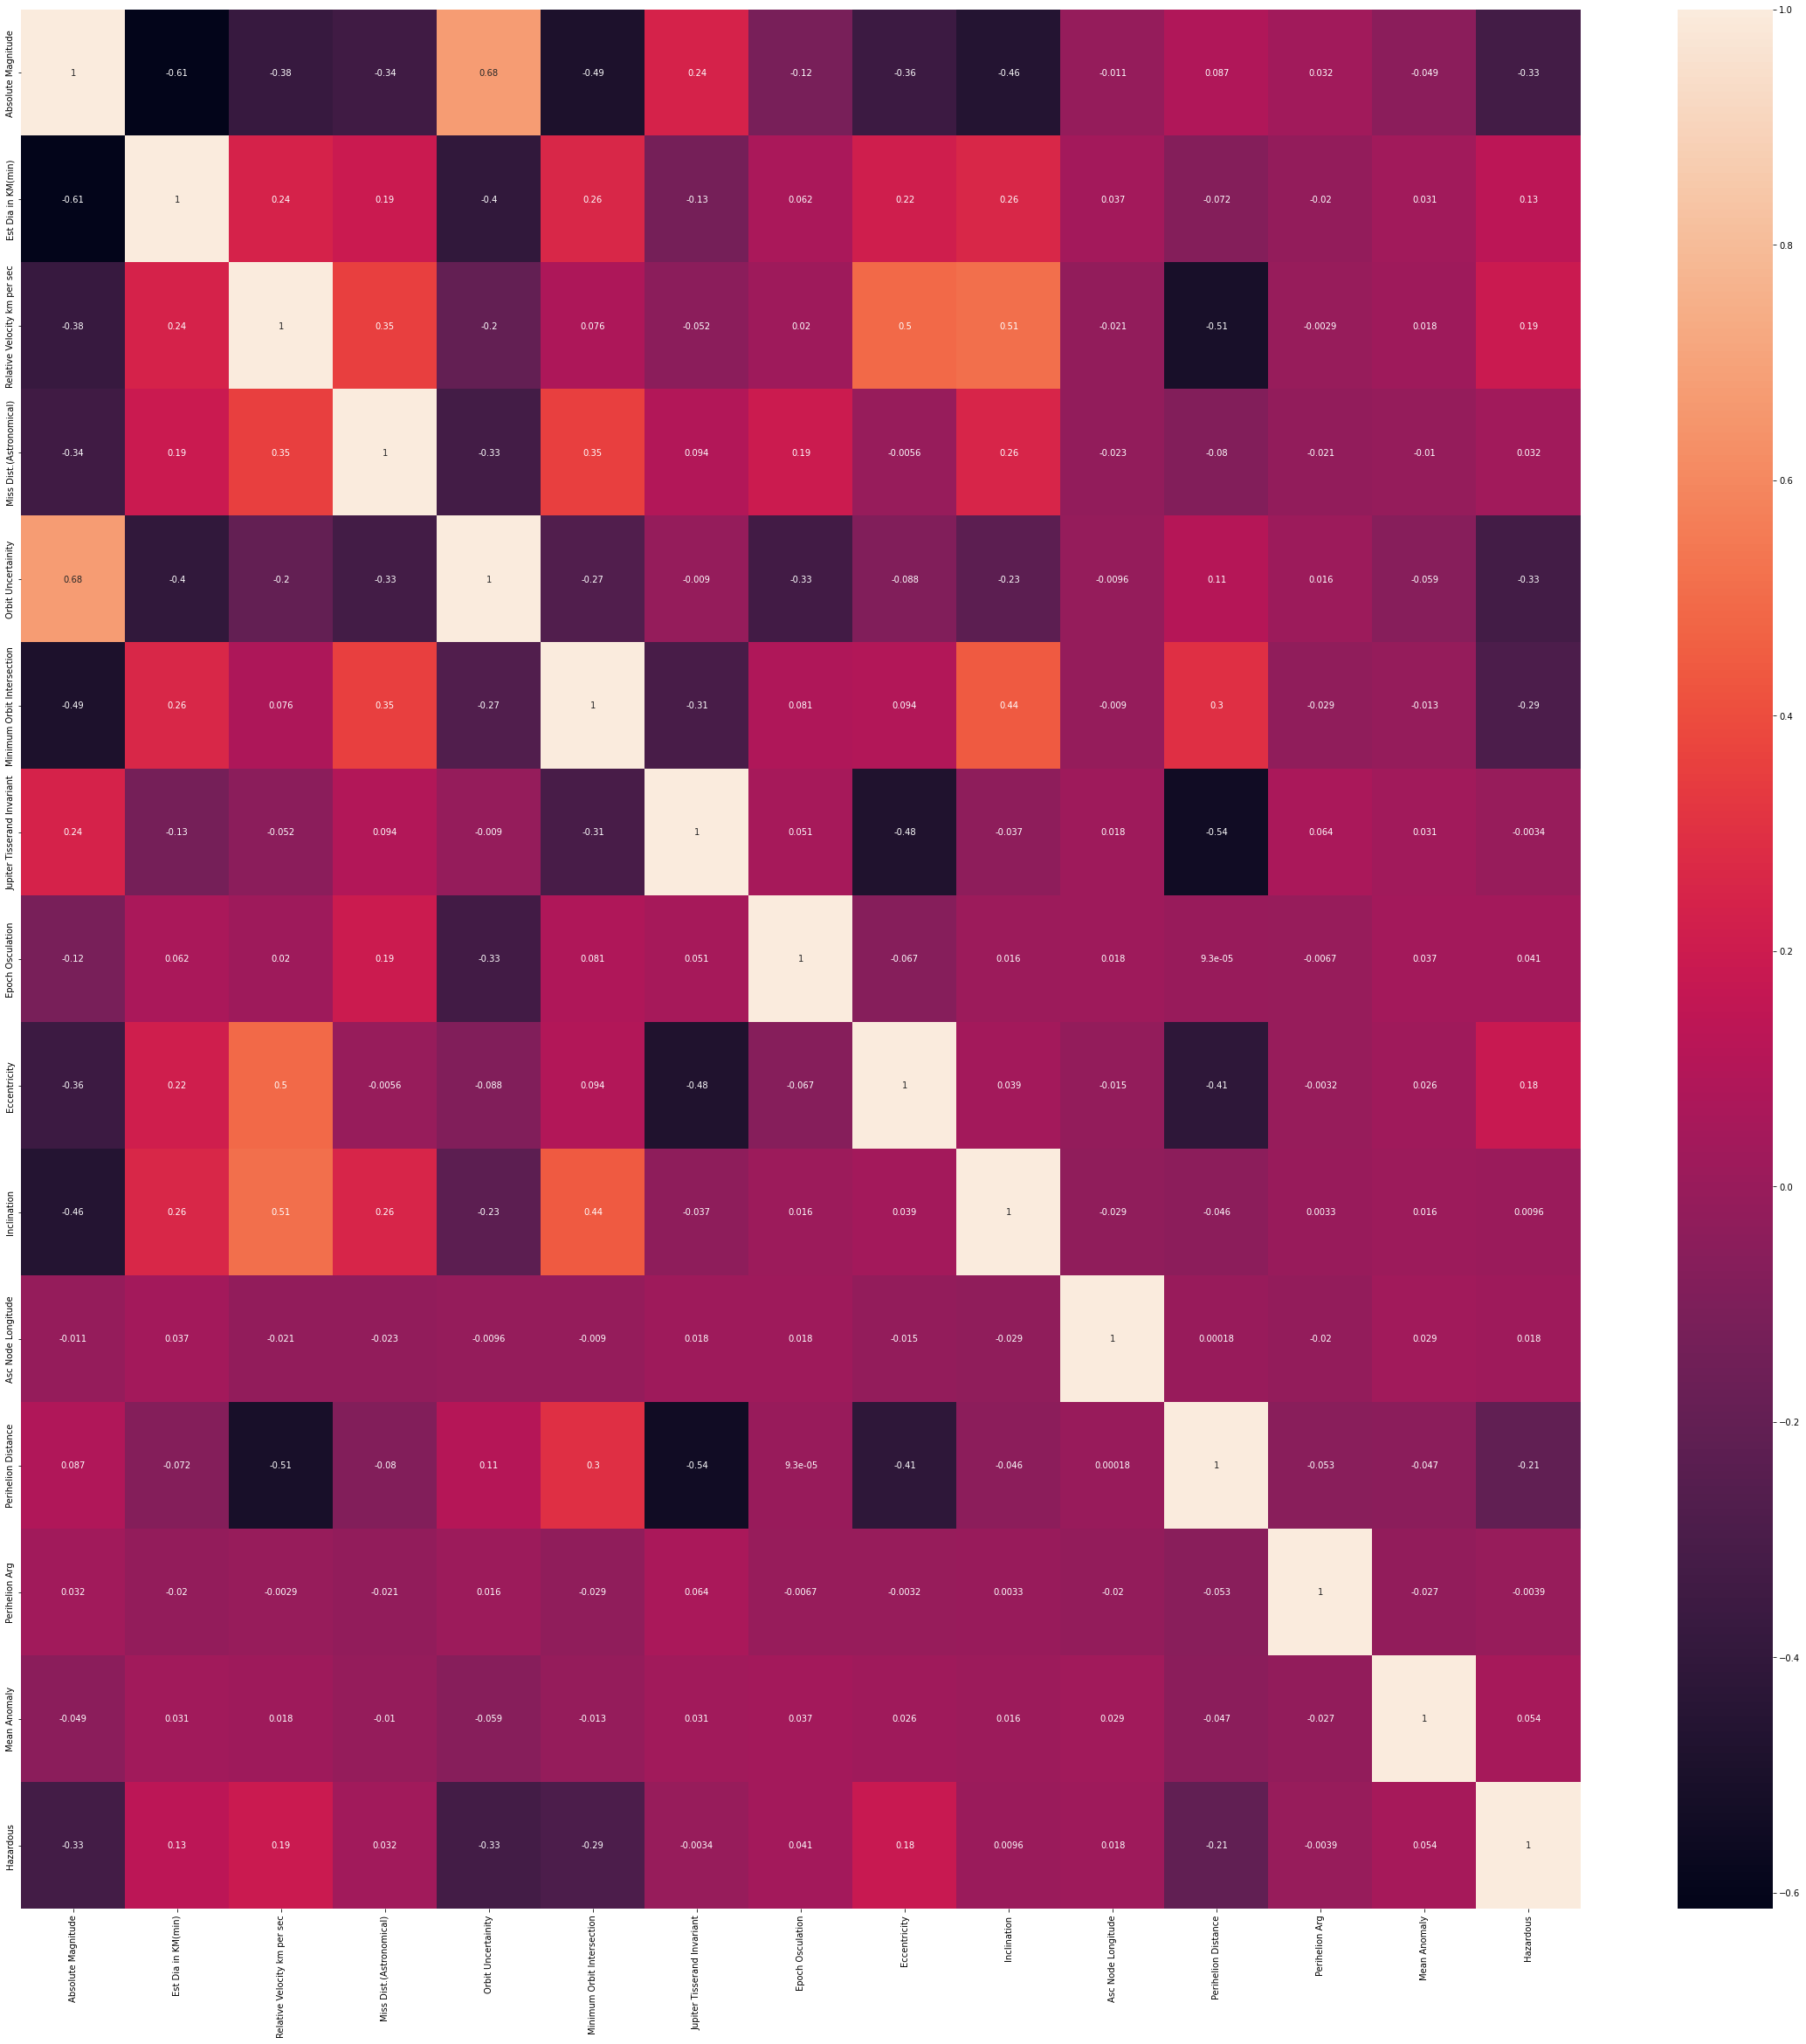

In [ ]:
plt.figure(figsize = (40,40))
heatmap(data.corr(), annot = True)

## Feature Scaling:

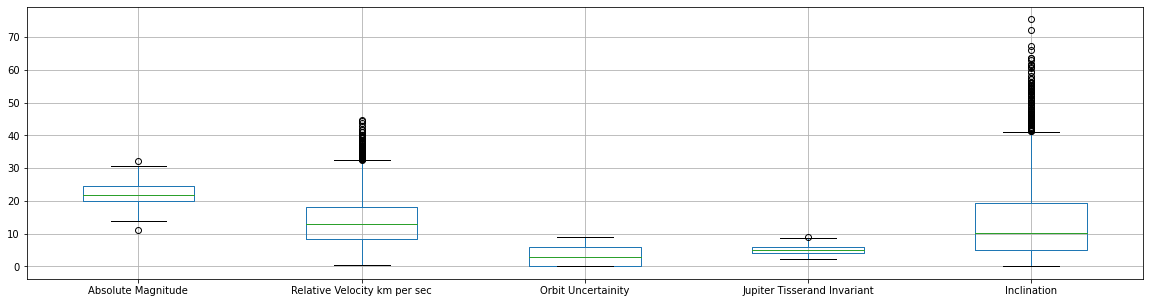

In [ ]:
plt.figure(figsize = (20,5))
data.boxplot(column = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Orbit Uncertainity', 'Jupiter Tisserand Invariant', 'Inclination'])

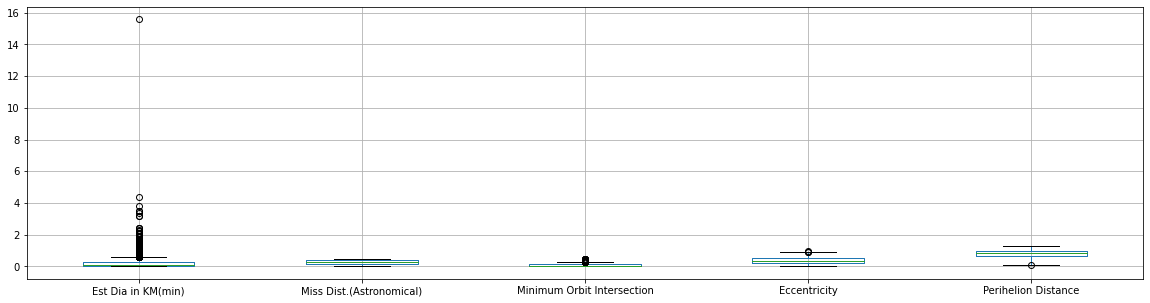

In [ ]:
plt.figure(figsize = (20,5))
data.boxplot(column = ['Est Dia in KM(min)', 'Miss Dist.(Astronomical)', 'Minimum Orbit Intersection', 'Eccentricity', 'Perihelion Distance'])

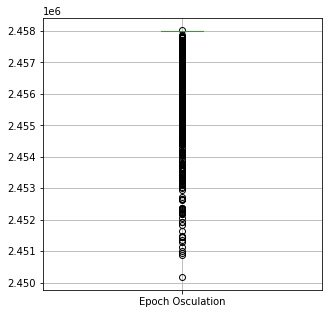

In [ ]:
plt.figure(figsize = (5,5))
data.boxplot(column = ['Epoch Osculation'])

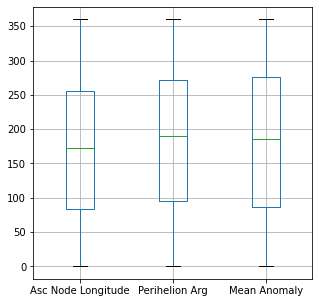

In [ ]:
plt.figure(figsize = (5,5))
data.boxplot(column = ['Asc Node Longitude', 'Perihelion Arg', 'Mean Anomaly'])




As the dataset is prone outliers, it should be scaled using a scaler which is not sensitive to outliers.



In [ ]:
data[data.columns[:len(data.columns)-1]] = RobustScaler().fit_transform(data[data.columns[:len(data.columns)-1]])
data.head(5)

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous
0,-0.068182,0.074491,-0.705257,0.616006,0.333333,-0.202586,-0.221884,0.0,0.195538,-0.294574,0.824380,-0.067943,-0.752217,0.417458,1
1,-0.136364,0.160019,0.538747,0.470561,0.000000,1.280355,0.195989,0.0,-0.076508,1.244122,-0.208834,-0.313743,0.700137,-0.063199,0
2,-0.363636,0.547695,-0.552338,-0.853782,-0.500000,-0.039516,-0.260980,0.0,-0.089125,-0.417467,0.505105,0.321072,0.332971,0.565491,1
3,1.250000,-0.462859,-0.180825,0.080937,0.500000,-0.383949,0.011170,0.0,-0.574003,-0.165364,-0.671445,0.411441,-0.971061,-0.617216,0
4,-0.068182,0.074491,-0.319039,0.569541,-0.333333,-0.115289,0.042143,0.0,-0.596579,0.445487,-0.511767,0.367185,-0.178812,-0.266861,1


## Data Analysis

As the Target Feature is categorical in nature, Classifier ML Models are to be used.



In [ ]:
pairplot(data, hue='Hazardous', corner = True)

Output hidden; open in https://colab.research.google.com to view.

As the dataset is not linearly separable, Non-linear Classifier ML Models are to be used.



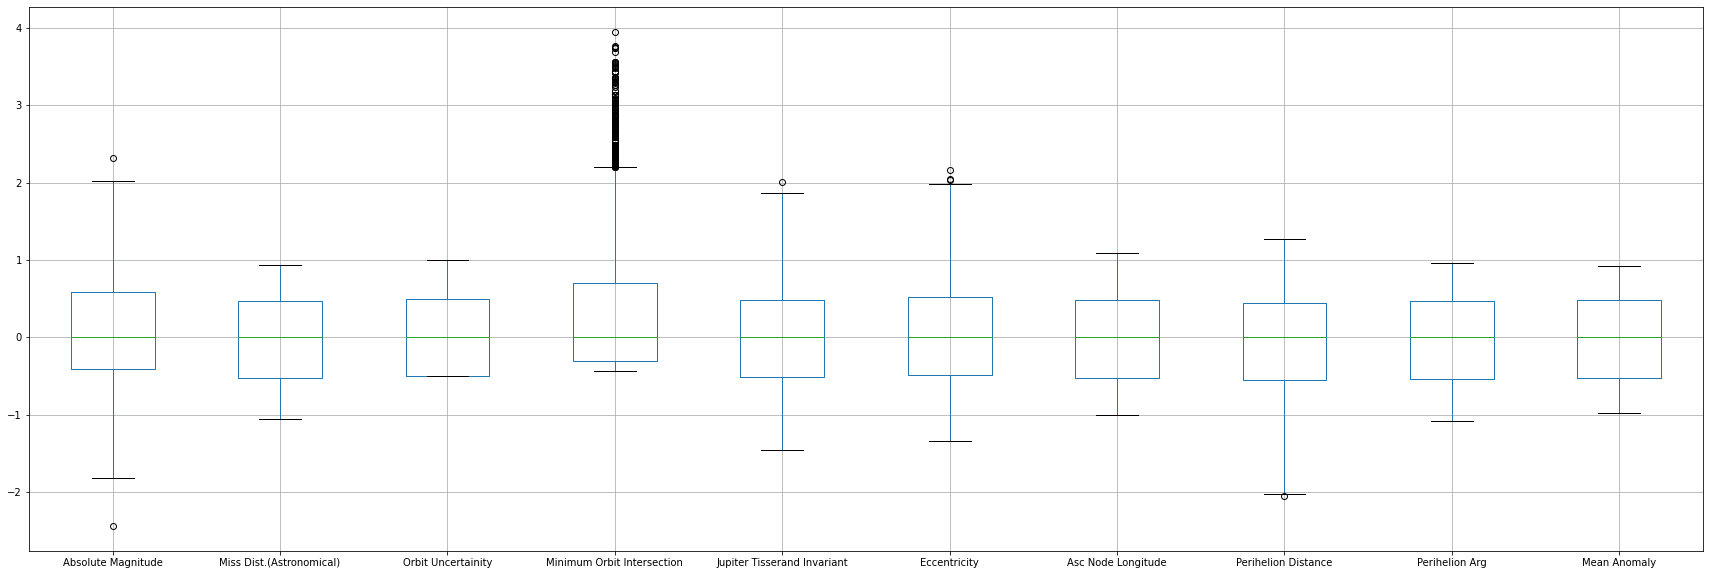

In [ ]:
plt.figure(figsize = (30,10))
data.boxplot(column = ['Absolute Magnitude', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Eccentricity', 'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg', 'Mean Anomaly'])

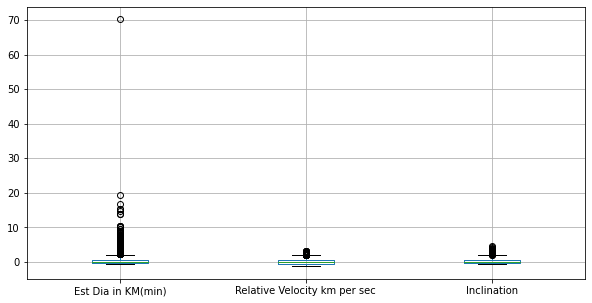

In [ ]:
plt.figure(figsize = (10,5))
data.boxplot(column = ['Est Dia in KM(min)','Relative Velocity km per sec', 'Inclination'])

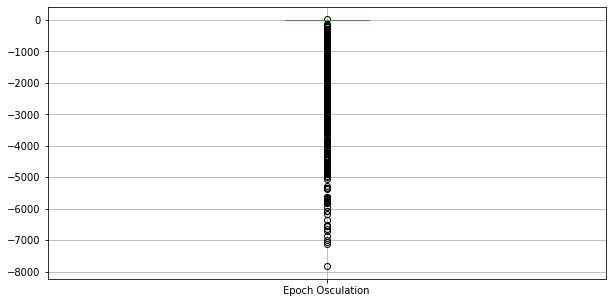

In [ ]:
plt.figure(figsize = (10,5))
data.boxplot(column = ['Epoch Osculation'])

The features with significant number of outliers are to be removed.






In [ ]:
data.drop(['Est Dia in KM(min)','Relative Velocity km per sec', 'Epoch Osculation', 'Inclination'], axis = 1, inplace = True)
data.columns

Index(['Absolute Magnitude', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Eccentricity', 'Asc Node Longitude', 'Perihelion Distance',
       'Perihelion Arg', 'Mean Anomaly', 'Hazardous'],
      dtype='object')

# Model Application

## Splitting Dataset

In [ ]:
features = data[data.columns[:len(data.columns)-1]]
target = data[data.columns[-1]]

The features would be splited with a Train-Test ratio of 80:20.



In [ ]:
trainFeatures, testFeatures, trainTarget, testTarget = train_test_split(features, target, test_size = 0.2, random_state = 1)

## Random Forest Classifier


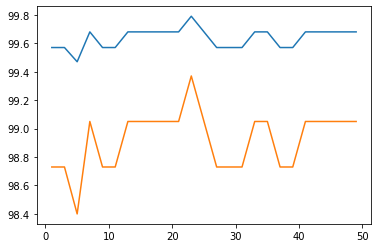

In [ ]:
acc_val, f1_val = [],[]

for i in range(1,50,2):
    model = RandomForestClassifier(n_estimators = i,criterion = 'gini', random_state = 1)
    model.fit(trainFeatures, trainTarget)
    predTarget = model.predict(testFeatures)
    acc_val.append(round(accuracy_score(testTarget, predTarget)*100, 2))
    f1_val.append(round(f1_score(testTarget, predTarget)*100, 2))
    
plt.plot(range(1,50,2), acc_val)
plt.plot(range(1,50,2), f1_val)
plt.show()

From the graph it is clear that Random Forest Classifier produces best output on this dataset when n_estimators = 23.



### Result Analysis for RFC:



Model: Random Forest
Accuracy Score: 99.79%
F1 Score: 99.37%


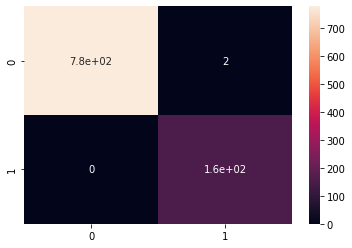

In [ ]:
model = RandomForestClassifier(n_estimators = 23, criterion = 'gini', random_state = 1)
model.fit(trainFeatures, trainTarget)
predTarget = model.predict(testFeatures)

print(f'Model: Random Forest\nAccuracy Score: {round(accuracy_score(testTarget, predTarget)*100, 2)}%\nF1 Score: {round(f1_score(testTarget, predTarget)*100, 2)}%')
heatmap(confusion_matrix(testTarget, predTarget), annot=True)

## Support Vector Classifier:

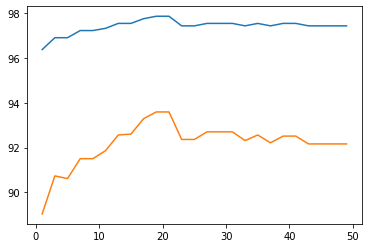

In [ ]:
acc_val, f1_val = [],[]

for i in range(1,50,2):
    model = SVC(C = i, kernel = 'rbf')
    model.fit(trainFeatures, trainTarget)
    predTarget = model.predict(testFeatures)
    acc_val.append(round(accuracy_score(testTarget, predTarget)*100, 2))
    f1_val.append(round(f1_score(testTarget, predTarget)*100, 2))

plt.plot(range(1,50,2), acc_val)
plt.plot(range(1,50,2), f1_val)
plt.show()

From the graph it is clear that Support Vector Classifier produces best output on this dataset when C = 19.



### Result Analysis for SVC:



Model: Support Vector Machine
Accuracy Score: 97.87%
F1 Score: 93.59%


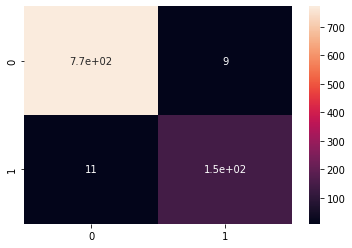

In [ ]:
model = SVC(C = 19, kernel = 'rbf')
model.fit(trainFeatures, trainTarget)
predTarget = model.predict(testFeatures)

print(f'Model: Support Vector Machine\nAccuracy Score: {round(accuracy_score(testTarget, predTarget)*100, 2)}%\nF1 Score: {round(f1_score(testTarget, predTarget)*100, 2)}%')
heatmap(confusion_matrix(testTarget, predTarget), annot=True)

## K-Nearest Neighbor Classifier

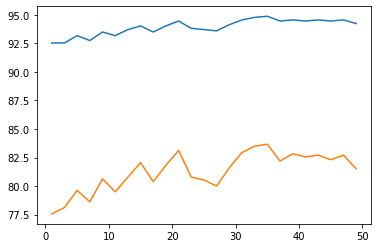

In [ ]:
acc_val, f1_val = [],[]

for i in range(1,50,2):
    model = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    model.fit(trainFeatures, trainTarget)
    predTarget = model.predict(testFeatures)
    acc_val.append(round(accuracy_score(testTarget, predTarget)*100, 2))
    f1_val.append(round(f1_score(testTarget, predTarget)*100, 2))

plt.plot(range(1,50,2), acc_val)
plt.plot(range(1,50,2), f1_val)
plt.show()

From the graph it is clear that K-Nearest Neighbor Classifier produces best output on this dataset when n_neighbors = 35.



### Result Analysis for KNC:



Model: K-Nearest Neighbor Classifier
Accuracy Score: 94.88%
F1 Score: 83.67%


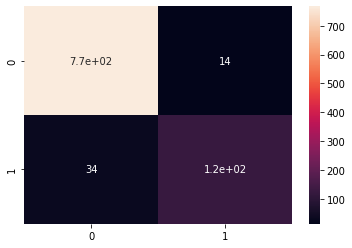

In [ ]:
model = KNeighborsClassifier(n_neighbors = 35, weights = 'distance')
model.fit(trainFeatures, trainTarget)
predTarget = model.predict(testFeatures)

print(f'Model: K-Nearest Neighbor Classifier\nAccuracy Score: {round(accuracy_score(testTarget, predTarget)*100, 2)}%\nF1 Score: {round(f1_score(testTarget, predTarget)*100, 2)}%')
heatmap(confusion_matrix(testTarget, predTarget), annot=True)

Among the three Classifiers used on the dataset, Random Forest Classifier has the highest value of accuracy score and f1 score and the lowest value of false positives and false negetives. Thereby it is concluded that for this dataset, Random Forest Classifier produced the best outcome.